In [23]:
import pandas as pd
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(color_codes=True)

In [4]:
flights_all=pd.read_csv('./flights.csv',dtype={"ORIGIN_AIRPORT": str, "DESTINATION_AIRPORT": str})


In [ ]:
#reg_master = =pd.read_csv('./flights.csv',dtype={"ORIGIN_AIRPORT": str, "DESTINATION_AIRPORT": str})

In [5]:
flights_peak = flights_all[((flights_all['MONTH']>4) & (flights_all['MONTH']<12)) ]
flights_peak = flights_peak[(flights_all['ORIGIN_AIRPORT'] == 'SFO') | (flights_all['DESTINATION_AIRPORT'] == 'SFO')]

flights_peak.to_csv('./flights_SFO.csv')



C:\Users\dazbe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [6]:
flights = flights_peak.groupby('AIRLINE')['FLIGHT_NUMBER','DEPARTURE_DELAY','ARRIVAL_DELAY','DIVERTED','CANCELLED','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY']

airlines_names =  {'AA': "American Airlines", 'AS': "Alaska Airlines",'B6':'Jetblue Airways ','DL':'Delta Air Lines','EV':'ExpressJet Airlines','F9':'Frontier Airlines','HA':'Hawaiian Airlines','MQ':'Envoy Air','NK':'Spirit Airlines','OO':'SkyWest Airlines','UA':'United Airlines','VX':'Virgin America','WN':'Southwest Airlines','US':'US Airways'}
flights = pd.DataFrame({'Airline Name': airlines_names,'Flights Total' : flights_peak.groupby('AIRLINE')['FLIGHT_NUMBER'].size()}).reset_index()

flights.columns = ['AIRLINE', 'Airline Name','Flights Total']
flights = flights.dropna()
flights.reset_index(drop=True)
flights

,AIRLINE,Airline Name,Flights Total
0,AA,American Airlines,14802.0
1,AS,Alaska Airlines,5744.0
2,B6,Jetblue Airways,5510.0
3,DL,Delta Air Lines,12179.0
5,F9,Frontier Airlines,2280.0
6,HA,Hawaiian Airlines,732.0
9,OO,SkyWest Airlines,36679.0
10,UA,United Airlines,52673.0
11,US,US Airways,1970.0
12,VX,Virgin America,18074.0


In [12]:
c = flights_peak[flights_peak['CANCELLATION_REASON'] == 'A']

f = pd.DataFrame({'Cancelled Flights Total' : c.groupby('AIRLINE')['FLIGHT_NUMBER'].count()}).reset_index()
f = pd.merge(flights, f,how='left', on = 'AIRLINE')
f['Cancelled Flights Total'].fillna(0.0, inplace=True)
f

,AIRLINE,Airline Name,Flights Total,Cancelled Flights Total
0,AA,American Airlines,14802.0,68.0
1,AS,Alaska Airlines,5744.0,15.0
2,B6,Jetblue Airways,5510.0,11.0
3,DL,Delta Air Lines,12179.0,19.0
4,F9,Frontier Airlines,2280.0,0.0
5,HA,Hawaiian Airlines,732.0,5.0
6,OO,SkyWest Airlines,36679.0,298.0
7,UA,United Airlines,52673.0,404.0
8,US,US Airways,1970.0,3.0
9,VX,Virgin America,18074.0,50.0


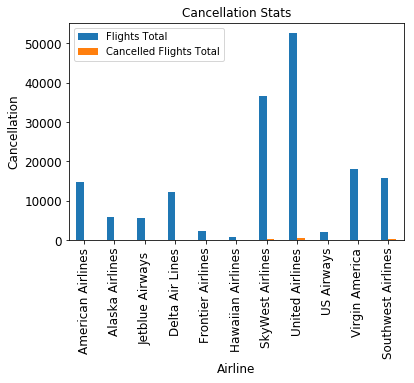

In [13]:
ax = f.plot(x='Airline Name' ,kind='bar', title ="Cancellation Stats", legend=True, fontsize=12)
ax.set_xlabel("Airline", fontsize=12)
ax.set_ylabel("Cancellation", fontsize=12)
plt.show()

In [14]:
print("Cancellations by airlines")
cancl = (f['Cancelled Flights Total'].iloc[:14])/f['Flights Total'].iloc[:14]

cancl_stats =  pd.DataFrame({'AIRLINE':f['AIRLINE'],'Airline Name':f['Airline Name'],'Cancellation':cancl})
cancl_stats 

Cancellations by airlines


,AIRLINE,Airline Name,Cancellation
0,AA,American Airlines,0.004594
1,AS,Alaska Airlines,0.002611
2,B6,Jetblue Airways,0.001996
3,DL,Delta Air Lines,0.001560
4,F9,Frontier Airlines,0.000000
5,HA,Hawaiian Airlines,0.006831
6,OO,SkyWest Airlines,0.008125
7,UA,United Airlines,0.007670
8,US,US Airways,0.001523
9,VX,Virgin America,0.002766


In [15]:
cancl_stats.describe()

,Cancellation
count,11.000000
mean,0.005341
std,0.005885
min,0.000000
25%,0.001778
50%,0.002766
75%,0.007250
max,0.021080


In [16]:
reliability_by_cancl = (f['Flights Total'].iloc[:14]- f['Cancelled Flights Total'].iloc[:14])/f['Flights Total'].iloc[:14]

reliability_stats =  pd.DataFrame({'AIRLINE':f['AIRLINE'],'Airline Name':f['Airline Name'],'Reliability by Cancellation':reliability_by_cancl})
reliability_stats 

,AIRLINE,Airline Name,Reliability by Cancellation
0,AA,American Airlines,0.995406
1,AS,Alaska Airlines,0.997389
2,B6,Jetblue Airways,0.998004
3,DL,Delta Air Lines,0.998440
4,F9,Frontier Airlines,1.000000
5,HA,Hawaiian Airlines,0.993169
6,OO,SkyWest Airlines,0.991875
7,UA,United Airlines,0.992330
8,US,US Airways,0.998477
9,VX,Virgin America,0.997234


In [17]:
reliability_stats.describe()

,Reliability by Cancellation
count,11.000000
mean,0.994659
std,0.005885
min,0.978920
25%,0.992750
50%,0.997234
75%,0.998222
max,1.000000


In [17]:
delays=pd.read_csv('./count_test.csv',dtype={"Count of Airline Delay": int, "Count of Flight Number": int})

In [14]:
delays

,Airline,Count of Airline Delay,Count of Flight Number
0,Hawaiian Airlines,187,732
1,US Airways,374,"1,970"
2,Frontier Airlines,587,"2,280"
3,Alaska Airlines,"1,007","5,744"
4,JetBlue Airways,"1,272","5,510"
5,Delta Air Lines,"2,196","12,179"
6,American Airlines,"2,604","14,802"
7,Virgin America,"3,439","18,074"
8,Southwest Airlines,"3,648","15,892"
9,Skywest Airlines,"7,377","36,679"


In [31]:
cancl = (delays['Count of Airline Delay'].iloc[:10])/delays['Count of Flight Number'].iloc[:10]

cancl_stats =  pd.DataFrame({'Airline':delays['Airline'],'Delays':cancl})
cancl_stats 



,Airline,Delays
0,Hawaiian Airlines,0.255464
1,US Airways,0.189848
2,Frontier Airlines,0.257456
3,Alaska Airlines,0.175313
4,JetBlue Airways,0.230853
5,Delta Air Lines,0.180310
6,American Airlines,0.175922
7,Virgin America,0.190273
8,Southwest Airlines,0.229549
9,Skywest Airlines,0.201123


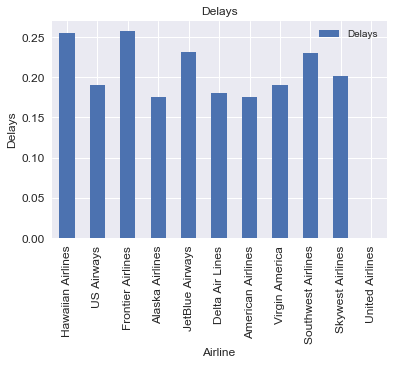

Percentage of Delays by Airline


In [30]:
ax = cancl_stats.plot(x='Airline' ,kind='bar', title ="Delays", legend=True, fontsize=12)
ax.set_xlabel("Airline", fontsize=12)
ax.set_ylabel("Delays", fontsize=12)
plt.show()
print("Percentage of Delays by Airline")

In [19]:
cancl = (delays['Count of Airline Delay'].iloc[:10])/delays['Count of Flight Number'].iloc[:10] *100

cancl_stats =  pd.DataFrame({'Airline':delays['Airline'],'Delays':cancl})
cancl_stats
print("")

,Airline,Delays
0,Hawaiian Airlines,25.546448
1,US Airways,18.984772
2,Frontier Airlines,25.745614
3,Alaska Airlines,17.531337
4,JetBlue Airways,23.085299
5,Delta Air Lines,18.031037
6,American Airlines,17.592217
7,Virgin America,19.027332
8,Southwest Airlines,22.954946
9,Skywest Airlines,20.112326
